In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

In [2]:
df = pd.read_csv('Bengaluru_House_Data.csv')
df.shape

(13320, 9)

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.isnull().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

## Checking which columns are needed and which are Not

#### One Hot Encoding area_type to see if it is necessary data or not

In [5]:
dummies = pd.get_dummies(df.area_type)
dummies
df1 = pd.concat([df,dummies], axis='columns')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_type             13320 non-null  object 
 1   availability          13320 non-null  object 
 2   location              13320 non-null  object 
 3   size                  13304 non-null  object 
 4   society               7818 non-null   object 
 5   total_sqft            13320 non-null  object 
 6   bath                  13247 non-null  float64
 7   balcony               12711 non-null  float64
 8   price                 13320 non-null  float64
 9   Built-up  Area        13320 non-null  uint8  
 10  Carpet  Area          13320 non-null  uint8  
 11  Plot  Area            13320 non-null  uint8  
 12  Super built-up  Area  13320 non-null  uint8  
dtypes: float64(3), object(6), uint8(4)
memory usage: 988.7+ KB


In [7]:
df2= df1.dropna(subset= ['size'])
df2

,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00,1,0,0,0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00,0,0,0,1
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00,1,0,0,0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00,0,0,0,1


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13304 entries, 0 to 13319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   area_type             13304 non-null  object 
 1   availability          13304 non-null  object 
 2   location              13304 non-null  object 
 3   size                  13304 non-null  object 
 4   society               7805 non-null   object 
 5   total_sqft            13304 non-null  object 
 6   bath                  13247 non-null  float64
 7   balcony               12711 non-null  float64
 8   price                 13304 non-null  float64
 9   Built-up  Area        13304 non-null  uint8  
 10  Carpet  Area          13304 non-null  uint8  
 11  Plot  Area            13304 non-null  uint8  
 12  Super built-up  Area  13304 non-null  uint8  
dtypes: float64(3), object(6), uint8(4)
memory usage: 1.1+ MB


In [9]:
df2['bhk']=df2['size'].apply(lambda x : int(x.split(' ')[0]))
df2.head()

C:\Users\jimce\AppData\Local\Temp\ipykernel_21348\2138727573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x : int(x.split(' ')[0]))


,area_type,availability,location,size,society,total_sqft,bath,balcony,price,Built-up Area,Carpet Area,Plot Area,Super built-up Area,bhk
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07,0,0,0,1,2
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,0,0,1,0,4
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00,1,0,0,0,3
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00,0,0,0,1,3
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00,0,0,0,1,2


<Axes: >

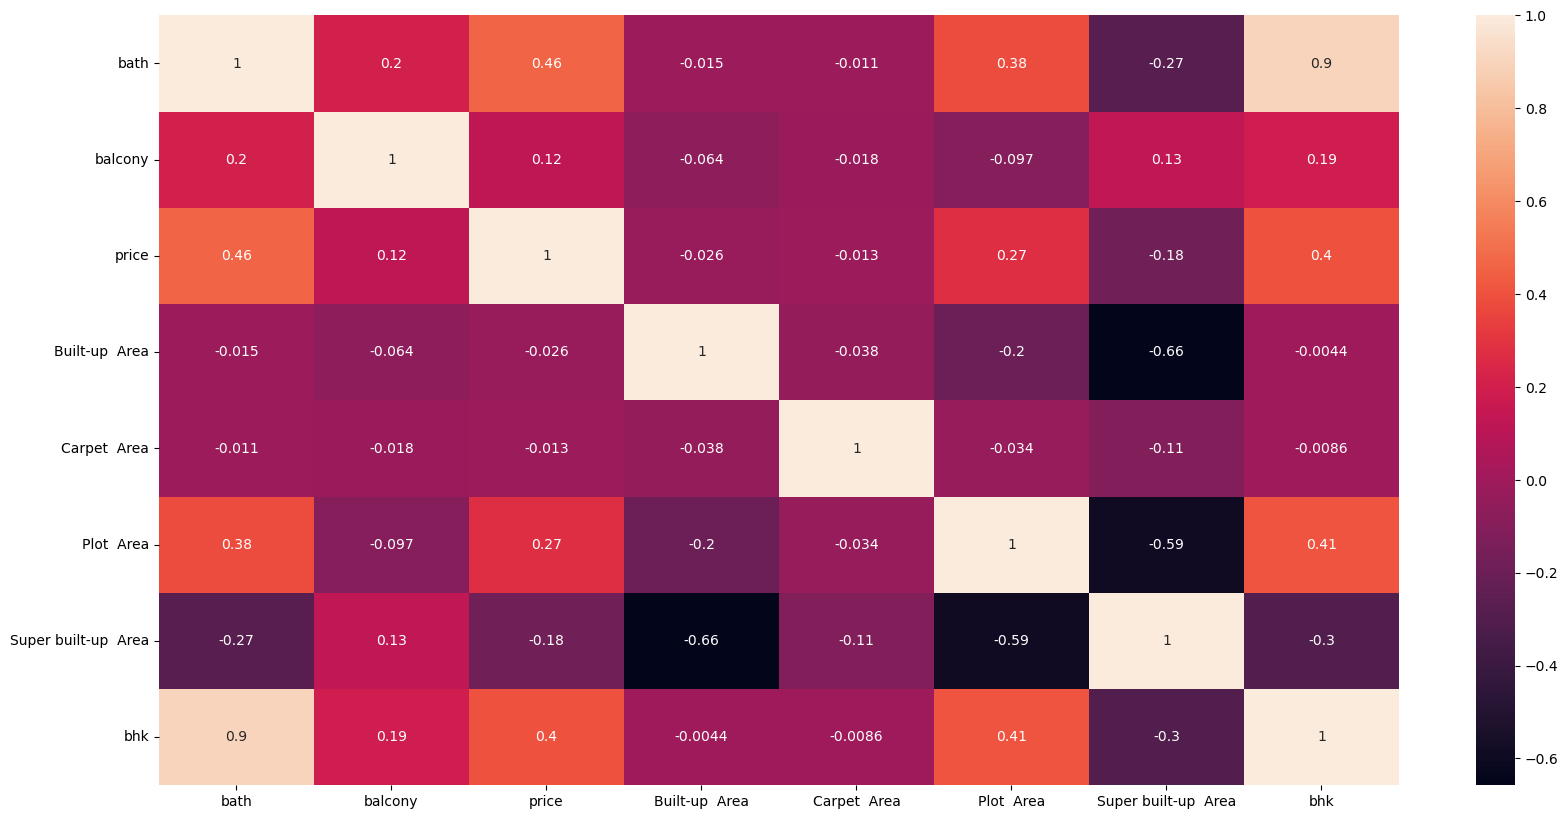

In [10]:
#df2.corr()
import seaborn as sns
sns.heatmap(df2[['bath', 'balcony', 'price', 'Built-up  Area','Carpet  Area','Plot  Area','Super built-up  Area','bhk']].corr(),annot=True)

### Since there isn't much Correlation between [Price and (balcony, area_type)] , removing them, and only considering location, bath, size(bhk), total_sqft in our DataSet

In [11]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [12]:
df3 = df.drop(['balcony', 'society', 'availability', 'area_type'], axis=1)
df3.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [13]:
df3.shape

(13320, 5)

In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [15]:
df3.isnull().sum()

location       0
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [16]:
df3 = df3.dropna()
df3.shape

(13247, 5)

In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13247 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13247 non-null  object 
 1   size        13247 non-null  object 
 2   total_sqft  13247 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13247 non-null  float64
dtypes: float64(2), object(3)
memory usage: 621.0+ KB


### Since Size is in different formats as 2BKH, 2Bedroom etc, just taking the number and ignoring the text

In [18]:
df3['bhk']=df3['size'].apply(lambda x : int(x.split(' ')[0]))
df3.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [19]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [20]:
df3[~df3['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [21]:
# now size column is NOT Necessary since we have bhk col
df3.drop(['size'],axis=1, inplace=True)

In [22]:
df3.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2


In [23]:
df3['total_sqft'].values[130:180]

array(['880', '1200', '1535', '950', '1360', '1042 - 1105', '1280',
       '1260', '5000', '3050', '1563.05', '1000', '1167', '4000', '1828',
       '890', '1612', '1034', '1710', '957', '1250', '2795', '1125',
       '1020', '1200', '1735', '2050', '3750', '1350', '1063', '1904',
       '4200', '2000', '1145 - 1340', '1425', '1500', '1060', '1470',
       '1300', '450', '1152', '1350', '1550', '1500', '600', '400', '705',
       '770', '1242', '1700'], dtype=object)

#### here, we can see above that: total_sqrt column, we have some Numbers and some Ranges, (& some text) too, so considering Avg of those ranges and also neglecting text values

In [24]:
def convert(x):
    splits = x.split('-')
    if len(splits) == 2:
        return (float(splits[0])+float(splits[1]))/2
    try:
        return float(x)
    except:
        return None

In [25]:
df3['total_sqft'] = df3['total_sqft'].apply(convert)

In [26]:
df3['total_sqft']

0        1056.0
1        2600.0
2        1440.0
3        1521.0
4        1200.0
          ...  
13315    3453.0
13316    3600.0
13317    1141.0
13318    4689.0
13319     550.0
Name: total_sqft, Length: 13247, dtype: float64

In [27]:
df3['total_sqft'].isnull().sum()

46

In [28]:
df3 = df3.dropna(subset=['total_sqft'], axis=0)

In [29]:
df3['total_sqft'].isnull().sum()

0

In [30]:
df3

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453.0,4.0,231.00,5
13316,Richards Town,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4689.0,4.0,488.00,4


In [31]:
df3.corr()
#so, price and total_sqft has strong correlation

C:\Users\jimce\AppData\Local\Temp\ipykernel_21348\1532654345.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,total_sqft,bath,price,bhk
total_sqft,1.000000,0.392743,0.574329,0.346014
bath,0.392743,1.000000,0.455994,0.897951
price,0.574329,0.455994,1.000000,0.396880
bhk,0.346014,0.897951,0.396880,1.000000


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13201 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13201 non-null  object 
 1   total_sqft  13201 non-null  float64
 2   bath        13201 non-null  float64
 3   price       13201 non-null  float64
 4   bhk         13201 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 618.8+ KB


### ( Outlier removal, and further cleaning of Data)

# Feature Engineering

In [33]:
featured_df = df3.copy()
featured_df.shape

(13201, 5)

In [34]:
featured_df['price_per_sqft'] = featured_df['price']*100000/featured_df['total_sqft']
featured_df.shape

(13201, 6)

In [35]:
##########################featured_df.to_csv("bhp.csv",index=False)

# Since we have too many Locations, using Dimensionality reduction to reduce its number

In [36]:
reduced_df = featured_df.copy()
reduced_df.shape

(13201, 6)

In [37]:
len(featured_df['location'].unique())

1298

In [38]:
featured_df.location.value_counts()

Whitefield                   532
Sarjapur  Road               393
Electronic City              302
Kanakpura Road               264
Thanisandra                  232
                            ... 
Indiranagar HAL 2nd Stage      1
Maruthi HBCS Layout            1
K R C kothanur                 1
1Channasandra                  1
Abshot Layout                  1
Name: location, Length: 1298, dtype: int64

In [39]:
reduced_df['location'] = reduced_df.location.apply(lambda x: x.strip())
location_counts = reduced_df['location'].value_counts(ascending=False)
location_counts

Whitefield                   533
Sarjapur  Road               393
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [40]:
len(location_counts)

1287

In [41]:
location_counts[location_counts<=10]

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

#### since there are so many locations with only few data points, considering any location which has less than 10 values, to be categorized as 'other' location

In [42]:
small_locs = location_counts[location_counts<=10]

In [43]:
reduced_df['location'] = reduced_df['location'].apply(lambda x: 'other' if x in small_locs else x)

In [44]:
len(reduced_df.location.unique())
# so, reduced 1000+ locations to 209 locations

241

In [45]:
reduced_df['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13201, dtype: object

In [46]:
reduced_df.shape

(13201, 6)

In [47]:
df4 = reduced_df.copy()
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13201.000000,13201.000000,13201.000000,13201.000000,1.320100e+04
mean,1555.306169,2.691160,112.274187,2.800848,7.920566e+03
std,1237.276637,1.338867,149.170520,1.292796,1.067231e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267782e+03
50%,1275.000000,2.000000,71.890000,3.000000,5.438066e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317073e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [48]:
df4[df4['total_sqft']/df4['bhk'] < 300]

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...
13277,other,1400.0,7.0,218.0,7,15571.428571
13279,other,1200.0,5.0,130.0,6,10833.333333
13281,Margondanahalli,1375.0,5.0,125.0,5,9090.909091
13303,Vidyaranyapura,774.0,5.0,70.0,5,9043.927649


### (above, we can see that sqft is just 600 but it has 9 bathroom and 8bhk which is abnormal, so removing them, and also considering sqft per each bhk to be atleast 300)

In [49]:
df4 = df4[~(df4['total_sqft']/df4['bhk'] < 300)]

In [50]:
df4.shape

(12457, 6)

In [51]:
df4.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12457.000000,12457.000000,12457.000000,12457.000000,12457.000000
mean,1590.190715,2.562816,111.185938,2.649033,6308.427888
std,1260.354203,1.080239,152.197424,0.976012,4167.968413
min,300.000000,1.000000,9.000000,1.000000,267.829813
25%,1115.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


#### here, we can see that : min price per sqft is shown as 267 and max is 17lak...which are unrealistic, so doing Outlier removal using IQR

In [52]:
#df4.hist(column='total_sqft')

In [53]:
#Q1 = df4['total_sqft'].quantile(0.25)
#Q1

In [54]:
#Q3 = df4['total_sqft'].quantile(0.75)
#Q3

In [55]:
#IQR = Q3-Q1
#IQR

In [56]:
#df5 = df4[(df4['total_sqft']>(Q1-1.5 * IQR)) & (df4['total_sqft']<(Q3+1.5 * IQR))]

In [57]:
#df5.describe()

In [58]:
#df5.hist(column='total_sqft')
#now that we removed outliers, it looks evenly distributed

In [59]:
def pps_outliers(df):
    empty_df = pd.DataFrame()
    for i, subdf in df.groupby('location'):
        #print(i)#print(subdf)#print(np.std(subdf.price_per_sqft))
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        filtered_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        empty_df = pd.concat([empty_df,filtered_df],ignore_index=True)
    return empty_df
df5 = pps_outliers(df4)
df5.shape

(10243, 6)

In [60]:
df5

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10238,other,1353.0,2.0,110.00,2,8130.081301
10239,other,812.0,1.0,26.00,1,3201.970443
10240,other,1440.0,2.0,63.93,3,4439.583333
10241,other,1075.0,2.0,48.00,2,4465.116279


array([[<Axes: title={'center': 'total_sqft'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bhk'}>],
       [<Axes: title={'center': 'price_per_sqft'}>, <Axes: >]],
      dtype=object)

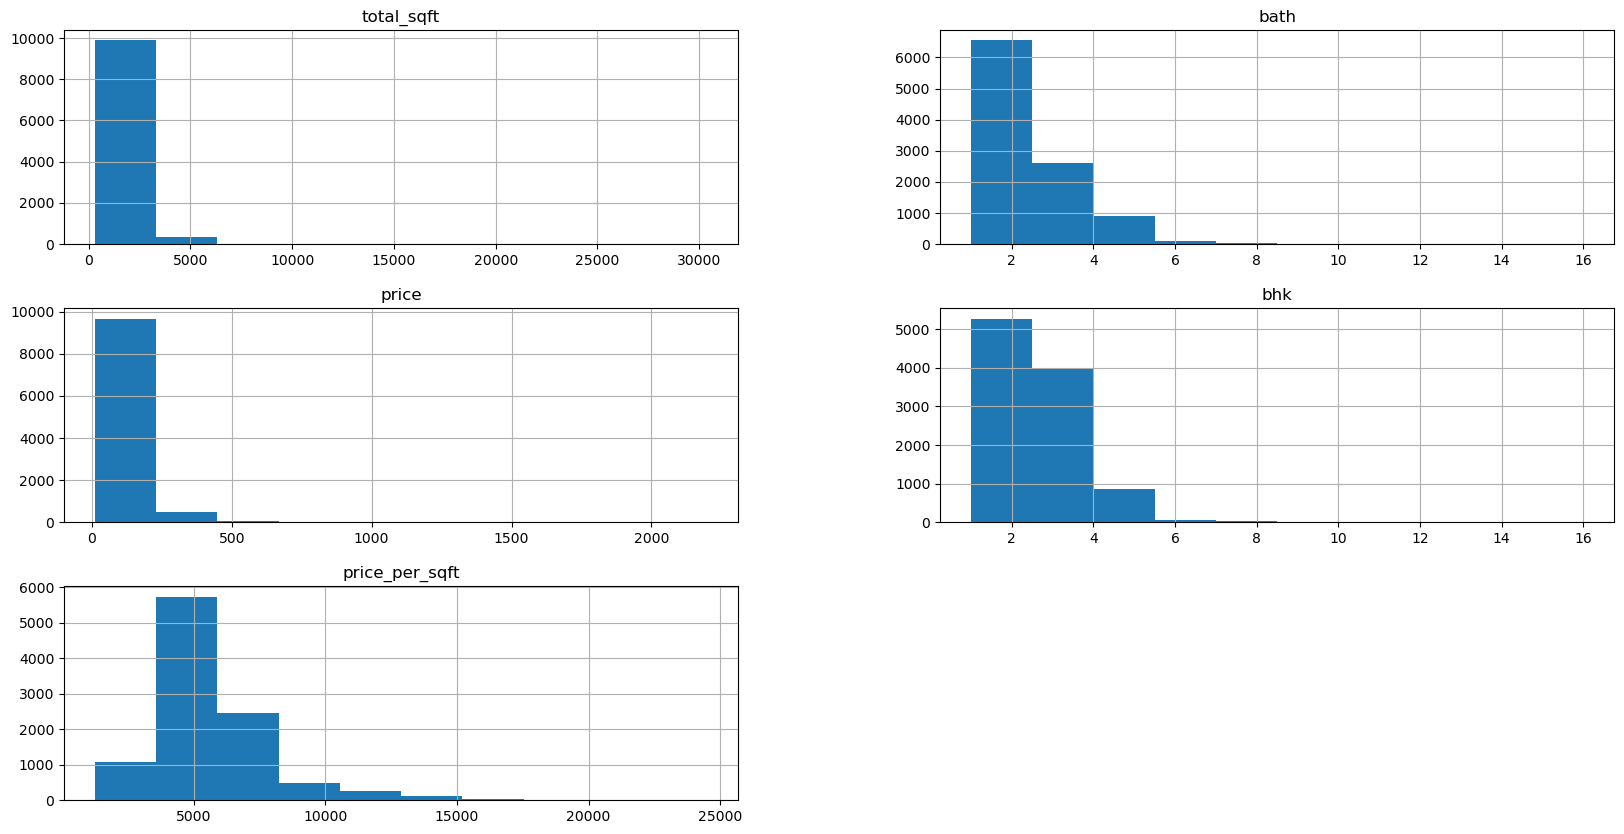

In [61]:
df5.hist(bins=10)

In [62]:
df5.corr()

C:\Users\jimce\AppData\Local\Temp\ipykernel_21348\2952672672.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df5.corr()


,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.672504,0.822755,0.643549,0.296823
bath,0.672504,1.000000,0.582566,0.860253,0.313563
price,0.822755,0.582566,1.000000,0.523862,0.696658
bhk,0.643549,0.860253,0.523862,1.000000,0.257156
price_per_sqft,0.296823,0.313563,0.696658,0.257156,1.000000


## Checking if bigger properties are cheaper than smaller ones 

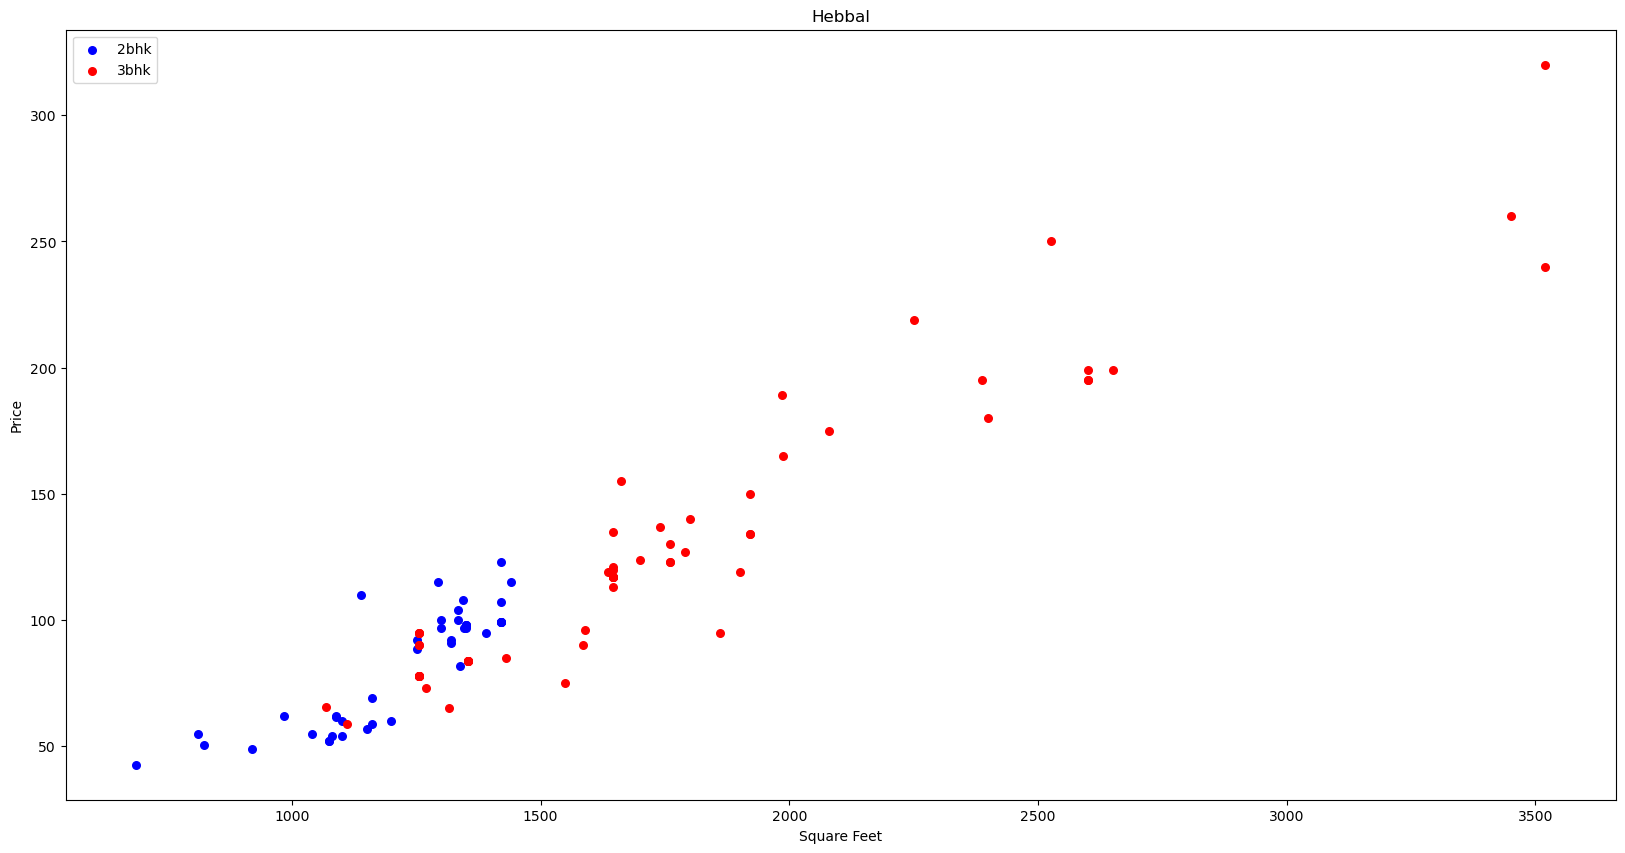

In [63]:
def plot_compare(df,location):
    plt.scatter(df[(df['location']==location) & (df['bhk']==2.0)]['total_sqft'], df[(df['location']==location) & (df['bhk']==2.0)]['price'], color='blue', label='2bhk',s=30)
    plt.scatter(df[(df['location']==location) & (df['bhk']==3.0)]['total_sqft'], df[(df['location']==location) & (df['bhk']==3.0)]['price'], color='red', label='3bhk',s=30)
    plt.xlabel('Square Feet')
    plt.ylabel('Price')
    plt.rcParams['figure.figsize'] = (11,8)
    plt.title(location)
    plt.legend()
    plt.show()
plot_compare(df5, 'Hebbal')

#### as we can see, there are a considerable amount of properties, where 2bhk price is > 3bhk's (so decreasing no. locations to check further)

## Checking for Houses in the same Location, for which... smaller ones are pricier than the larger ones, and removing them as outliers/abnormal data

In [64]:
#get i bhk price(mean), AND get i+1 bhk price , 
#if i price(mean) > i+1(price), remove i+1
#else keep it

In [65]:
#removables = np.array([])
#for k in range(2,9,1):
#    for i in grouped_df['price_per_sqft'][k]:
#        #print(i)
#        if i<means[k-1]:
#            #print(i)
#            removables = np.append(removables, (grouped_df['price_per_sqft'][k][grouped_df['price_per_sqft'][k] == i].index[0]) )   

In [66]:
#rem_index = np.array([])
#for loc,locdf in grp_df.groupby('location'):
#    #print(loc)
#    #print(locdf)
#    for bhk,bhkdf in locdf.groupby('bhk'):
#        print(bhk)
#        print(bhkdf['price_per_sqft'])
#        count = bhkdf.shape[0]
#        if bhk >1 and count>3:
#            for i in bhkdf['price_per_sqft']:
#                print(i)
#               #if i<(means1([bhk-1])):

In [67]:
grp_df = df5.copy() 
grp_df

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.00,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.00,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.00,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.00,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.00,2,11983.805668
...,...,...,...,...,...,...
10238,other,1353.0,2.0,110.00,2,8130.081301
10239,other,812.0,1.0,26.00,1,3201.970443
10240,other,1440.0,2.0,63.93,3,4439.583333
10241,other,1075.0,2.0,48.00,2,4465.116279


In [68]:
removable_index = np.array([])
for loc,locdf in grp_df.groupby('location'):
    #print(loc)
    #print(locdf)
    bhk_stats = {}
    for bhk,bhkdf in locdf.groupby('bhk'):
        #print(bhk)
        #print(bhkdf['price_per_sqft'])
        bhk_stats[bhk] = {'mean': np.mean(bhkdf.price_per_sqft),'count': bhkdf.shape[0]}
        #print(count)
        #print(mean)
        #print('mean')
    for bhk,bhkdf in locdf.groupby('bhk'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
            #print('yes')
            removable_index = np.append(removable_index, bhkdf[bhkdf.price_per_sqft<(stats['mean'])].index.values)
print(removable_index)

[1.1000e+01 7.0000e+00 2.3000e+01 ... 8.6220e+03 9.6730e+03 1.0215e+04]


In [69]:
len(removable_index)

2926

In [70]:
len(list(set(removable_index))) #to get unique values

2926

In [71]:
grp_df = grp_df.drop(removable_index,axis=0)
grp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7317 entries, 0 to 10242
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        7317 non-null   object 
 1   total_sqft      7317 non-null   float64
 2   bath            7317 non-null   float64
 3   price           7317 non-null   float64
 4   bhk             7317 non-null   int64  
 5   price_per_sqft  7317 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 400.1+ KB


In [72]:
grp_df.corr()

C:\Users\jimce\AppData\Local\Temp\ipykernel_21348\3381187856.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  grp_df.corr()


,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.712229,0.840919,0.675616,0.354137
bath,0.712229,1.000000,0.613456,0.882432,0.358739
price,0.840919,0.613456,1.000000,0.569647,0.710229
bhk,0.675616,0.882432,0.569647,1.000000,0.344023
price_per_sqft,0.354137,0.358739,0.710229,0.344023,1.000000


In [73]:
df6=grp_df.copy()
#df10

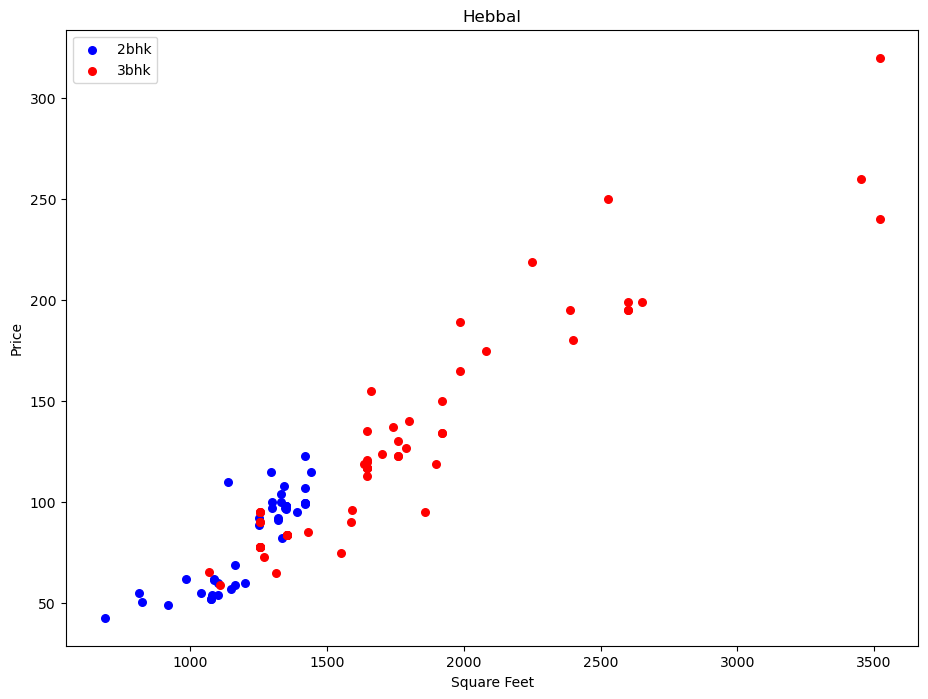

In [74]:
plot_compare(df5, 'Hebbal')

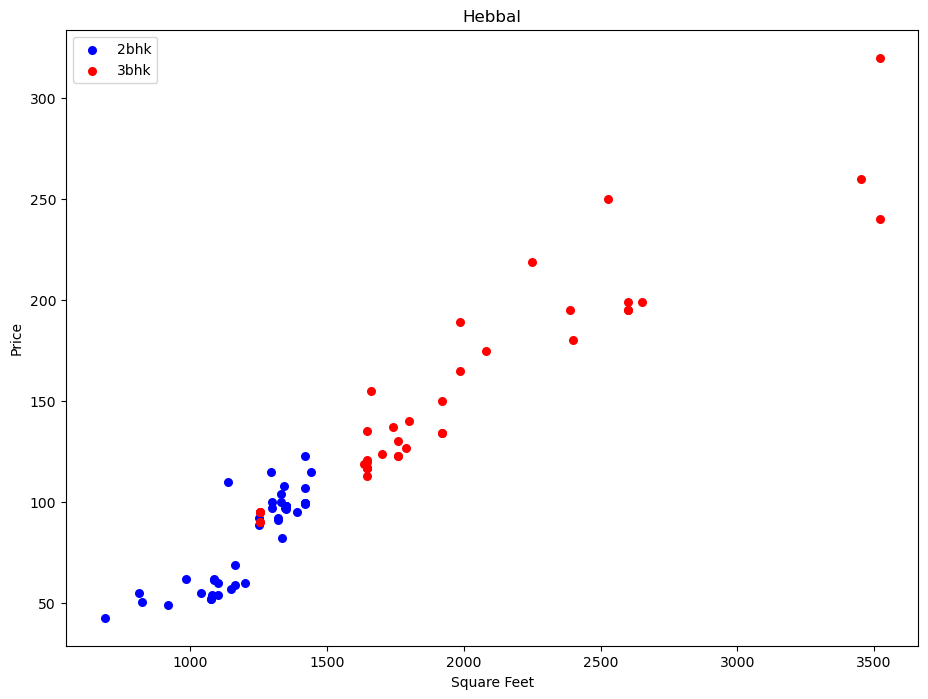

In [75]:
plot_compare(df6, 'Hebbal')

array([[<Axes: title={'center': 'total_sqft'}>,
        <Axes: title={'center': 'bath'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bhk'}>],
       [<Axes: title={'center': 'price_per_sqft'}>, <Axes: >]],
      dtype=object)

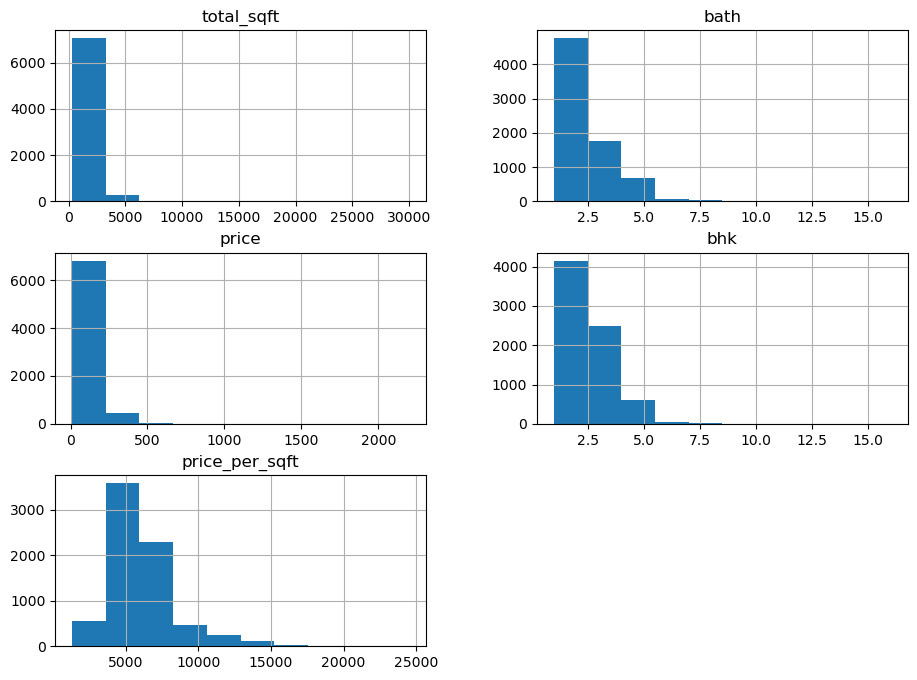

In [76]:
df6.hist()

In [77]:
df6.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7317.000000,7317.000000,7317.000000,7317.000000,7317.000000
mean,1493.516501,2.452098,98.839331,2.499932,6126.119223
std,860.566085,1.015090,93.090156,0.926439,2410.348498
min,300.000000,1.000000,10.000000,1.000000,1300.000000
25%,1096.000000,2.000000,50.000000,2.000000,4596.273292
50%,1260.000000,2.000000,73.000000,2.000000,5681.818182
75%,1680.000000,3.000000,112.000000,3.000000,6896.551724
max,30000.000000,16.000000,2200.000000,16.000000,24509.803922


In [78]:
df6[df6['bath']>10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8484,other,12000.0,12.0,525.0,10,4375.000000
8573,other,10000.0,16.0,550.0,16,5500.000000
9307,other,6000.0,12.0,150.0,11,2500.000000
9638,other,5425.0,13.0,275.0,13,5069.124424


#### considering bathrooms to be upto +2 of bedrooms and removing others as outliers

In [79]:
df6[df6['bath'] > df6['bhk']+2]

,location,total_sqft,bath,price,bhk,price_per_sqft
1626,Chikkabanavar,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,7000.0,8.0,450.0,4,6428.571429
6712,Thanisandra,1806.0,6.0,116.0,3,6423.034330
8409,other,11338.0,9.0,1000.0,6,8819.897689


#### here, 2460 sqft house seems to have 7 bathtooms, which is abnormal

In [80]:
df7 = df6[df6['bath'] < df6['bhk']+2]
df7.shape

(7239, 6)

In [81]:
df8=df7.copy()

In [82]:
df8.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,7239.000000,7239.000000,7239.000000,7239.000000,7239.000000
mean,1470.676319,2.413179,96.546676,2.483768,6099.475119
std,815.327820,0.938800,87.732734,0.908941,2382.659464
min,300.000000,1.000000,10.000000,1.000000,1300.000000
25%,1092.000000,2.000000,50.000000,2.000000,4589.170514
50%,1255.000000,2.000000,72.000000,2.000000,5666.666667
75%,1654.500000,3.000000,110.000000,3.000000,6862.745098
max,30000.000000,16.000000,2200.000000,16.000000,24509.803922


In [83]:
df8 = df8.drop(['price_per_sqft'],axis=1)
df8.shape

(7239, 5)

In [84]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7239 entries, 0 to 10242
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7239 non-null   object 
 1   total_sqft  7239 non-null   float64
 2   bath        7239 non-null   float64
 3   price       7239 non-null   float64
 4   bhk         7239 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 339.3+ KB


### One Hot Encoding the Location col (cause it has text currently), and using it to train models

In [85]:
df9 = df8.copy()
df9.shape

(7239, 5)

In [86]:
dummies1= pd.get_dummies(df9['location'])
dummies1.head(2)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [87]:
df10 = pd.concat([df9, dummies1.drop('other', axis=1)], axis=1)
df10.head(2)

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
#can also remove location(as it is encoded now)
df10 = df10.drop(['location'], axis=1)
df10

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10234,1200.0,2.0,70.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10235,1800.0,1.0,200.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10238,1353.0,2.0,110.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10239,812.0,1.0,26.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model Training

In [89]:
x = df10.drop(['price'], axis=1)

In [90]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [91]:
y = df10['price']

In [92]:
#from sklearn.model_selection import cross_val_score, train_test_split,ShuffleSplit
#from sklearn.metrics import r2_score, mean_squared_error
#def train(model,x,y):
#    x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=10)
##print((x_train.shape))
##print((y_train.shape))
#    model.fit(x_train.values, y_train) 
#    pred=model.predict(x_test.values)
#    r2 = r2_score(y_test,pred)
#    #cross validation
#    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
#    c = cross_val_score(model, x, y, cv=cv)
#    print('Model: ', model)
#    print('MSE: ', mean_squared_error(y_test,pred))
#    print('CV Score: ', c)
#    print('r2score: ', r2)


In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
model=LinearRegression()

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)
model.fit(x_train.values, y_train) 
pred=model.predict(x_test.values)  
r2 = r2_score(y_test,pred)
print('r2score: ', r2)

#train(model,x,y)
#r2 0.8629132245229444

r2score:  0.7971924202569198


In [94]:
#from sklearn.tree import DecisionTreeRegressor
#model=DecisionTreeRegressor()
#train(model,x,y)
# r2 0.704786016104248

In [95]:
#from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor()
#train(model,x,y)
#r2score:  0.7826158251315564

In [96]:
#from sklearn.ensemble import ExtraTreesRegressor
#model = ExtraTreesRegressor()
#train(model,x,y)
#r2score:  0.7826635650170908

In [97]:
#import xgboost as xgb
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score
#model = xgb.XGBRegressor()

#train(model,x,y)
#r2score:  0.8355912964986141

In [98]:
#axis = sns.distplot(x=y_test, hist=False, color='red', label='Actual Data')
#sns.distplot(x=pred, hist=False, color='blue', label='Predicted Data', ax=axis)
#plt.xlabel('Price')
#plt.title('Actual value vs Predicted Value')
#plt.legend(loc='best')
#plt.show()

#### Linear Regression seems to perform better than the rest, so using it

# Predicting Prices

In [99]:
def predict_prices(location,total_sqft,bath,bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    z = np.zeros(len(x.columns))
    z[0] = total_sqft
    z[1] = bath
    z[2] = bhk
    if loc_index >= 0:
        z[loc_index] = 1
        
    return model.predict([z])[0]    

In [100]:
predict_prices('Hebbal',1200, 3, 3)

92.17215152626338

In [101]:
predict_prices('1st Phase JP Nagar',1000, 2, 2)

97.2106315989659

In [102]:
predict_prices('Indira Nagar',1000, 2, 2)

192.90949707565017

In [103]:
predict_prices('Whitefield',3000, 5, 4)

220.60707985418438

In [104]:
predict_prices('Whitefield', 1250, 2, 3)

74.43863961063701

## Model Saving

In [105]:
import pickle

In [106]:
pickle.dump(model, open('model.pkl', 'wb'))

In [107]:
#getting all column names
all_cols = x.columns
#all_cols

In [108]:
pickle.dump(all_cols, open('columns.pkl', 'wb'))